In [1]:
import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from scipy.stats import zscore

In [2]:
price_dataset = datasets.PriceDataset()
[tr_x, tr_y, val_x, val_y] = price_dataset.getDataset()

In [3]:
target = pd.concat((tr_y, val_y))
target

,price
0,440000.0
1,994000.0
2,427000.0
3,415000.0
4,335000.0
...,...
4318,295000.0
4319,625000.0
4320,412500.0
4321,595000.0


In [4]:
data = pd.concat((tr_x, val_x))
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1310440590,201504.0,3,2.50,2290,6302,2.0,0,0,3,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500
1,1437580480,201409.0,5,3.25,4260,7861,2.0,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528
2,7617500075,201407.0,3,1.75,2000,7111,1.0,0,0,4,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000
3,8122100130,201406.0,3,1.75,1270,4800,1.0,0,0,3,7,1270,0,1952,2014,98126,47.5362,-122.376,1220,4800
4,4476400275,201501.0,3,1.75,2100,8298,1.0,0,0,4,7,1230,870,1952,0,98166,47.4601,-122.360,1700,10830


In [5]:
del data['id']
del data['date']

### Target graph

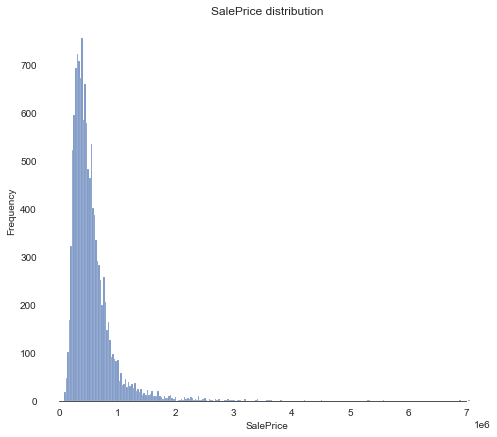

In [6]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.histplot(tr_y['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [7]:
print("Skewness: %f" % tr_y['price'].skew())
print("Kurtosis: %f" % tr_y['price'].kurt())

Skewness: 4.031836
Kurtosis: 35.163185


### Data_EDA

<인덱스 관련>  
ID : 집을 구분하는 번호  

  
<명목형>  
date : 집을 구매한 날짜   
bedrooms : 침실의 수  
bathrooms : 화장실의 수  
floors : 집의 층 수  
view : 집이 얼마나 좋아 보이는지의 정도  
condition : 집의 전반적인 상태  
yr_built : 지어진 년도  
yr_renovated : 집을 재건축한 년도  
zipcode : 우편번호  
grade : King County grading 시스템 기준으로 매긴 집의 등급  


<연속형>  
sqft_living : 주거 공간의 평방 피트  
sqft_lot : 부지의 평방 피트(면적)  
sqft_above : 지하실을 제외한 평방 피트(면적)  
sqft_basement : 지하실의 평방 피트(면적)  
lat : 위도  
long : 경도  
sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  
sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  

In [119]:
total_data = pd.concat((data, target), axis=1)
total_data[['bathrooms','bedrooms','grade','price']]

,bathrooms,bedrooms,grade,price
0,2.50,3,9,440000.0
1,3.25,5,10,994000.0
2,1.75,3,7,427000.0
3,1.75,3,7,415000.0
4,1.75,3,7,335000.0
...,...,...,...,...
4318,2.00,3,7,295000.0
4319,2.25,3,8,625000.0
4320,1.50,3,7,412500.0
4321,1.50,4,7,595000.0


In [125]:
total_data[['sqft_above','sqft_living','price']] 

,sqft_above,sqft_living,price
0,2290,2290,440000.0
1,4260,4260,994000.0
2,1360,2000,427000.0
3,1270,1270,415000.0
4,1230,2100,335000.0
5,1530,1530,164000.0
6,2770,2770,685000.0
7,1010,1010,241000.0
8,760,1000,159995.0
9,1170,2070,279000.0


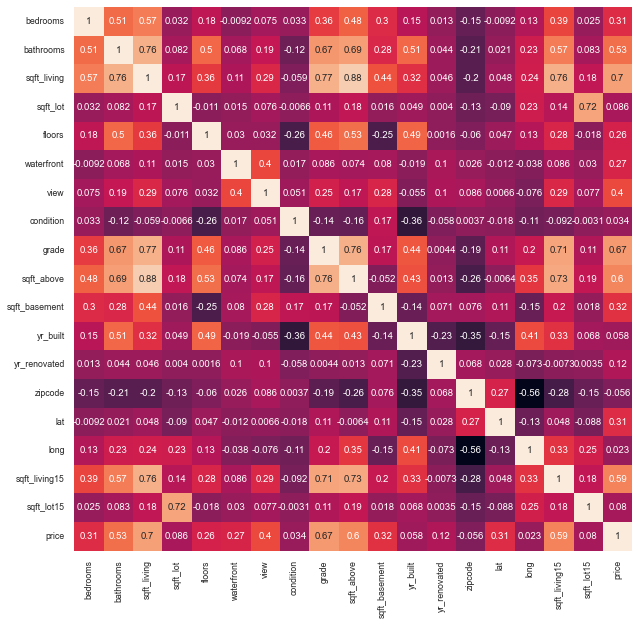

In [9]:
#상관 관계 행렬
total_data_corr=total_data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(total_data_corr, annot=True, cbar=False)
plt.show()

In [10]:
corr_order = total_data.corr().loc[:'sqft_lot15', 'price'].abs().sort_values(ascending=False)
corr_order

sqft_living      0.700241
grade            0.670901
sqft_above       0.603719
sqft_living15    0.591559
bathrooms        0.528705
view             0.401804
sqft_basement    0.323747
bedrooms         0.308996
lat              0.307434
waterfront       0.271197
floors           0.255690
yr_renovated     0.116310
sqft_lot         0.085668
sqft_lot15       0.080190
yr_built         0.057652
zipcode          0.056180
condition        0.034325
long             0.023311
Name: price, dtype: float64

### 연속형에서 전처리해줄만한 것들은
sqft_living, sqft_above, sqft_living15

Text(0.5, 1.0, 'sqft_above')

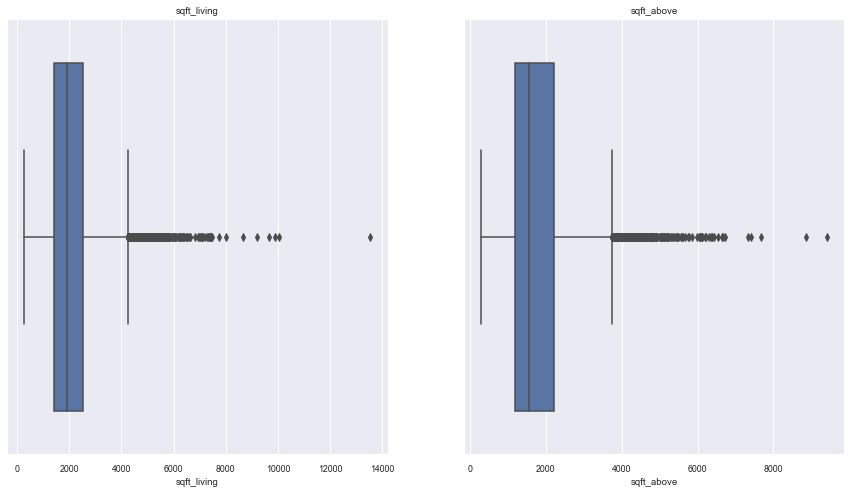

In [11]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x=total_data['sqft_living'], ax=axes[0])
axes[0].set_title('sqft_living')
sns.boxplot(x=total_data['sqft_above'], ax=axes[1])
axes[1].set_title('sqft_above')

Text(0.5, 1.0, 'sqft_above')

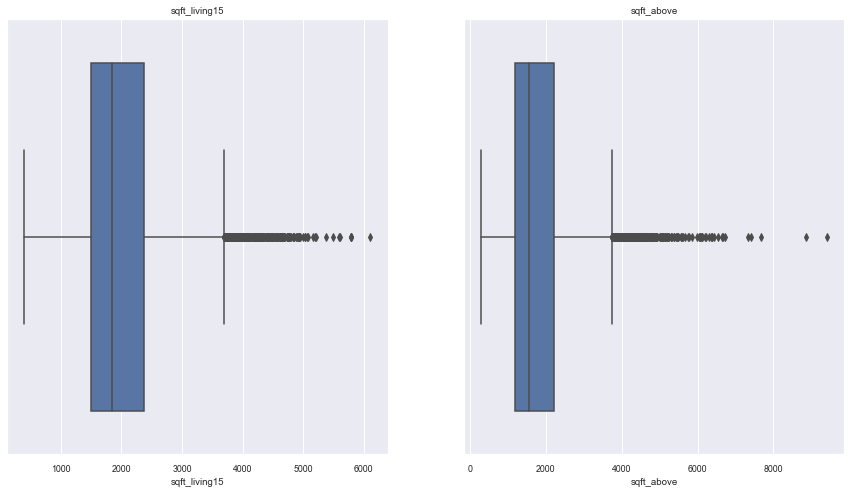

In [12]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x=total_data['sqft_living15'], ax=axes[0])
axes[0].set_title('sqft_living15')
sns.boxplot(x=total_data['sqft_above'], ax=axes[1])
axes[1].set_title('sqft_above')

In [13]:
def remove_outlier(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [14]:
total_data = remove_outlier(total_data, 'sqft_living')

455
(16605, 19)


Text(0.5, 1.0, 'sqft_above')

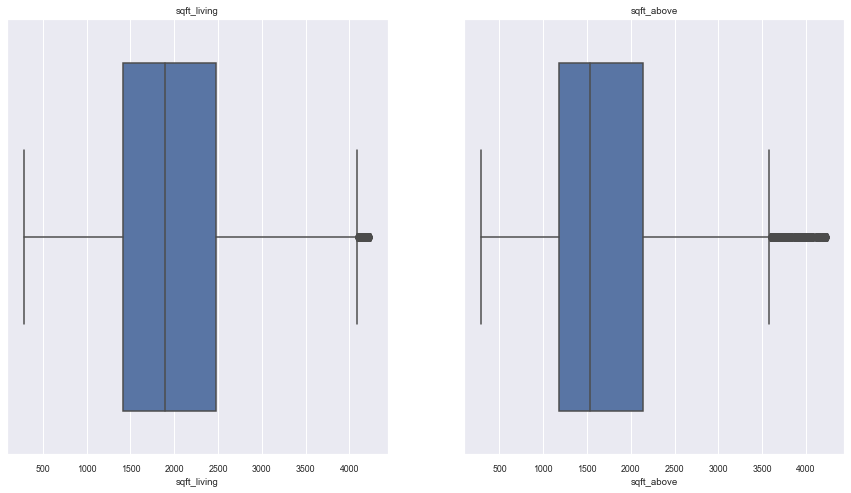

In [15]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x=total_data['sqft_living'], ax=axes[0])
axes[0].set_title('sqft_living')
sns.boxplot(x=total_data['sqft_above'], ax=axes[1])
axes[1].set_title('sqft_above')

In [16]:
total_data = remove_outlier(total_data, 'sqft_above')

317
(16145, 19)


Text(0.5, 1.0, 'sqft_above')

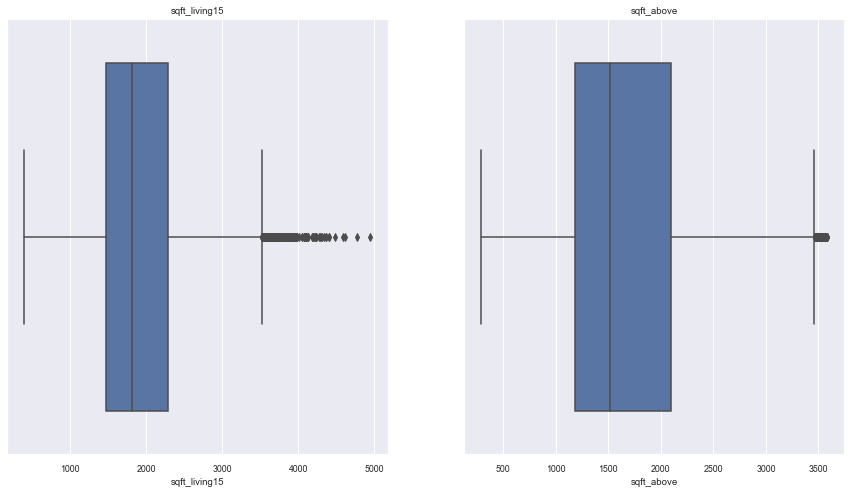

In [17]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x=total_data['sqft_living15'], ax=axes[0])
axes[0].set_title('sqft_living15')
sns.boxplot(x=total_data['sqft_above'], ax=axes[1])
axes[1].set_title('sqft_above')

Text(0.5, 1.0, 'sqft_above')

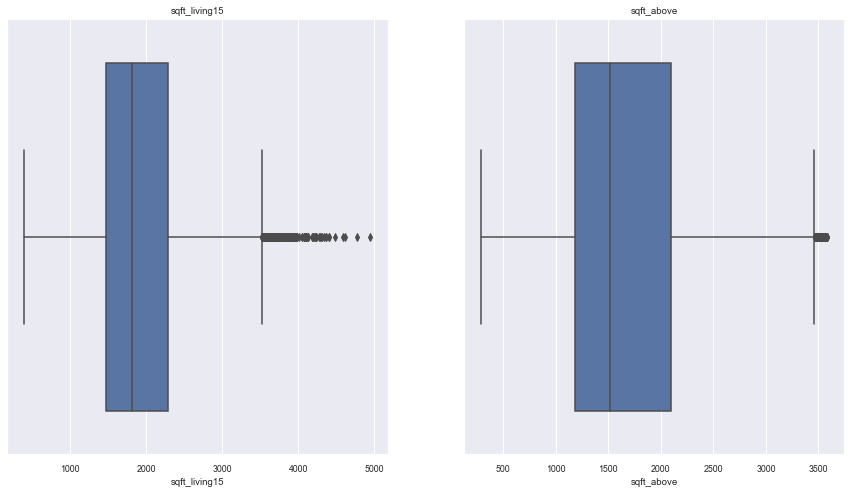

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x=total_data['sqft_living15'], ax=axes[0])
axes[0].set_title('sqft_living15')
sns.boxplot(x=total_data['sqft_above'], ax=axes[1])
axes[1].set_title('sqft_above')

In [19]:
colbin = ['bedrooms','bathrooms','floors','view','condition','yr_built','yr_renovated', 'zipcode', 'grade']
colnorm = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

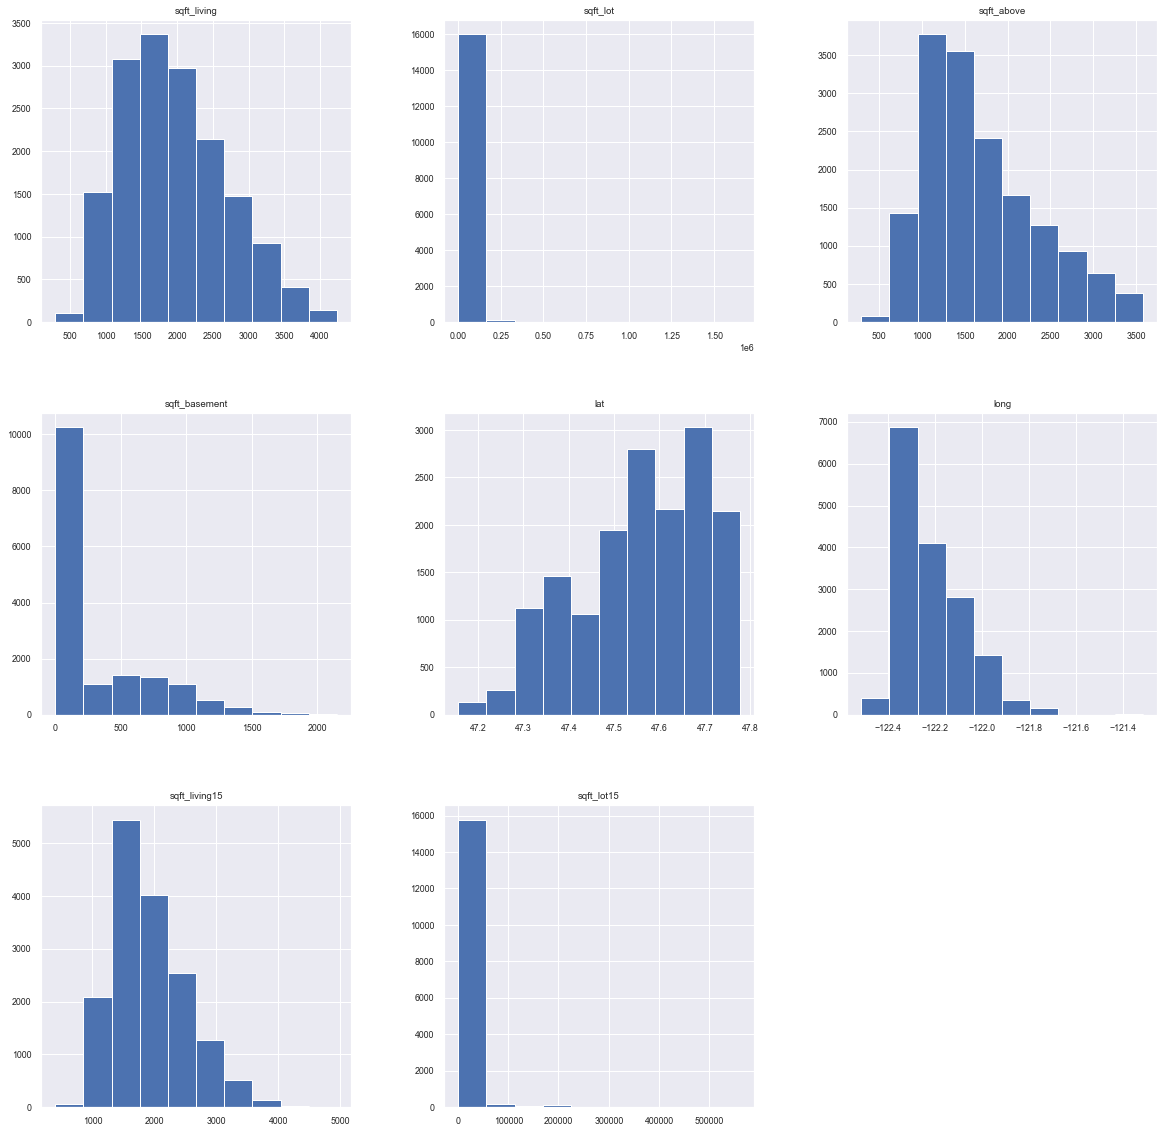

In [20]:
total_data[colnorm].hist(figsize=(20, 20))

In [21]:
### log화할 연속형 변수 & zcore
log_columns = ['sqft_lot', 'sqft_lot15'] 

for c in log_columns:
    total_data[c] = zscore(np.log1p(total_data[c].values))

## 정규화 할 연속형 변수
z_columns = ['sqft_living', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_basement']

for c in z_columns:
    total_data[c] = zscore(total_data[c].values, ddof=1)

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

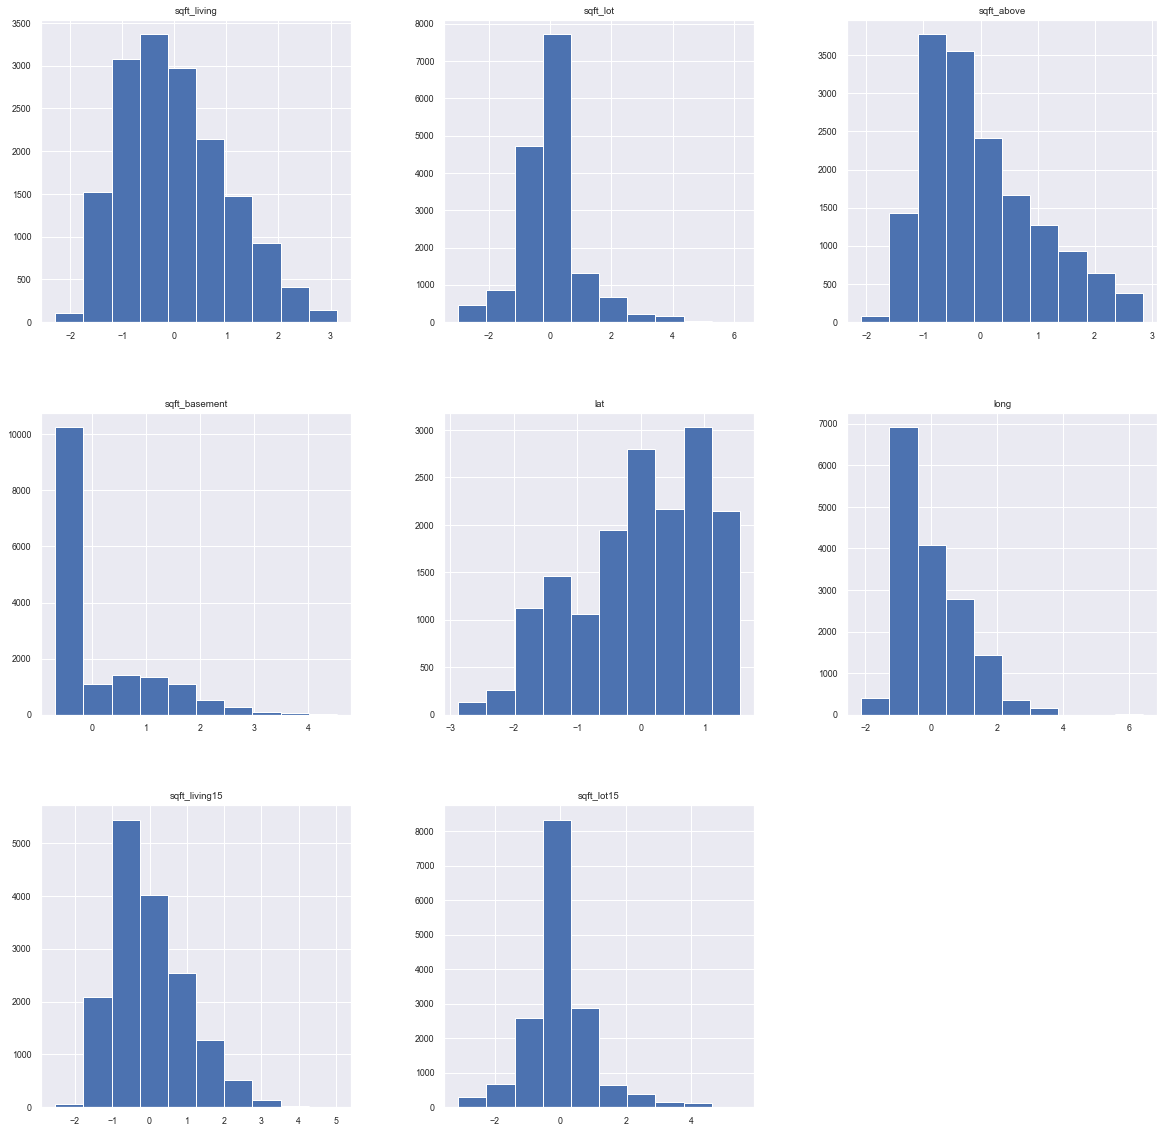

In [22]:
total_data[colnorm].hist(figsize=(20, 20))

In [23]:
colnorm = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'grade'}>]], dtype=object)

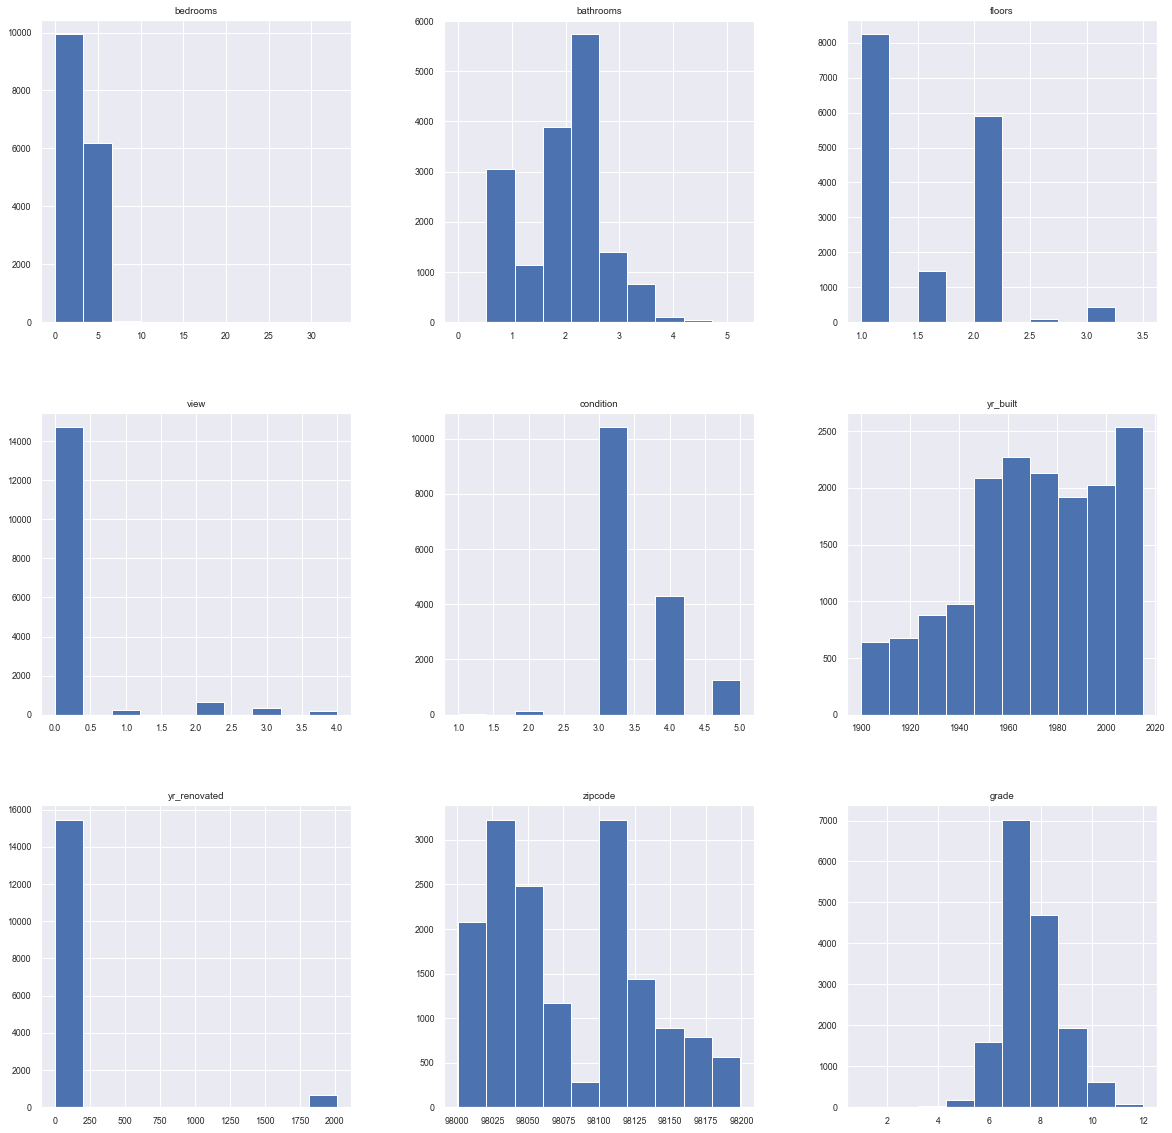

In [24]:
total_data[colbin].hist(figsize=(20, 20))

## 상관관계 분석

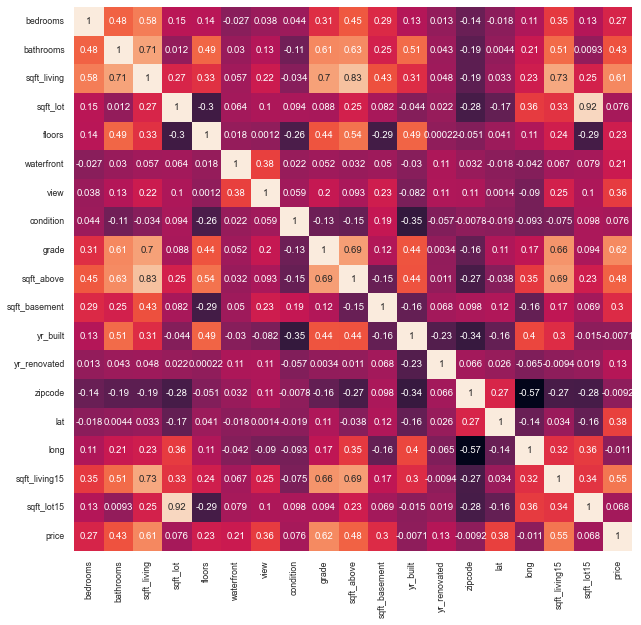

In [25]:
corr = total_data.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(corr, annot=True, cbar=False)
plt.show()

In [31]:
corr_order = total_data.corr().loc[colbin, 'price'].abs().sort_values(ascending=False)
corr_order

grade           0.620208
bathrooms       0.434248
view            0.362455
bedrooms        0.268301
floors          0.230468
yr_renovated    0.130995
condition       0.076045
zipcode         0.009183
yr_built        0.007145
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'bedrooms'}>]], dtype=object)

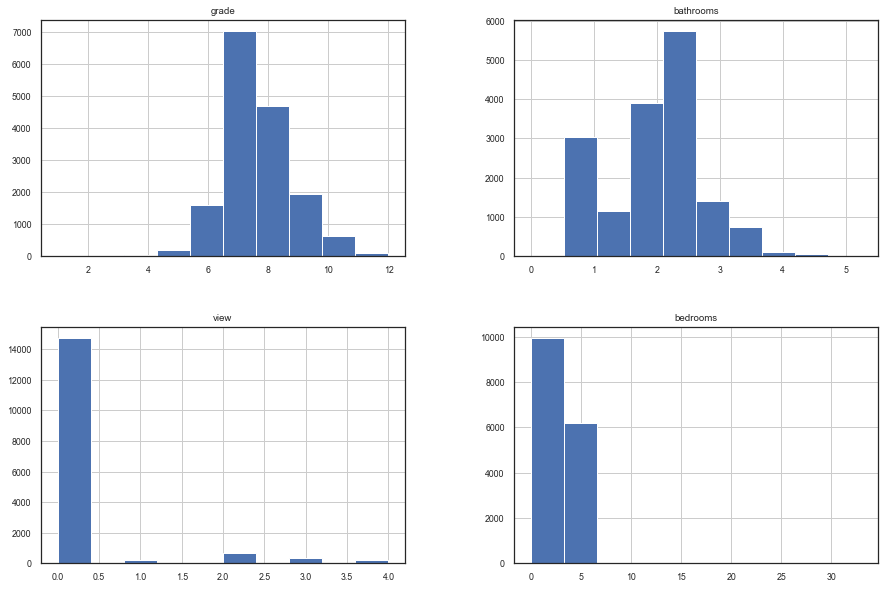

In [45]:
total_data[['grade','bathrooms', 'view', 'bedrooms']].hist(figsize=(15, 10))

In [107]:
total_data['grade'].value_counts()

1    7020
2    4690
3    1928
0    1801
4     706
Name: grade, dtype: int64

In [108]:
total_data['grade'].value_counts()

1    7020
2    4690
3    1928
0    1801
4     706
Name: grade, dtype: int64

In [109]:
total_data['view'].value_counts()

0    14724
1     1421
Name: view, dtype: int64

In [110]:
total_data['bathrooms'].value_counts()

0.00    8090
2.50    4167
2.25    1567
2.75     860
3.50     581
3.00     545
3.25     335
Name: bathrooms, dtype: int64

In [111]:
total_data['bedrooms'].value_counts()

2    7609
3    4968
1    2157
4    1244
0     167
Name: bedrooms, dtype: int64

In [106]:
## grade
total_data.loc[total_data['grade'] <= 6,'grade'] = 0
total_data.loc[total_data['grade'] == 7, 'grade'] = 1
total_data.loc[total_data['grade'] == 8, 'grade'] = 2
total_data.loc[total_data['grade'] == 9, 'grade'] = 3
total_data.loc[total_data['grade'] >= 10, 'grade'] = 4

# view
total_data.loc[total_data['view'] == 0, 'view'] = 0
total_data.loc[total_data['view'] >= 1, 'view'] = 1

# bathrooms
total_data.loc[total_data['bathrooms'] <= 2, 'bathrooms'] = 0
total_data.loc[total_data['bathrooms'] >= 3.5, 'bathrooms'] = 3.5

# bedrooms
total_data.loc[total_data['bedrooms'] <= 1, 'bedrooms'] = 0
total_data.loc[total_data['bedrooms'] == 2, 'bedrooms'] = 1
total_data.loc[total_data['bedrooms'] == 3, 'bedrooms'] = 2
total_data.loc[total_data['bedrooms'] == 4, 'bedrooms'] = 3
total_data.loc[total_data['bedrooms'] >= 5, 'bedrooms'] = 4

# floors
total_data.loc[(total_data['floors'] == 3.5) | (total_data['floors'] == 3.0), 'floors'] = 2.5

# condition
total_data.loc[total_data['condition'] == 1, 'condition'] = 2

# yr_renovated
total_data.loc[total_data['yr_renovated'] != 0, 'yr_renovated'] = 1

array([[<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>]], dtype=object)

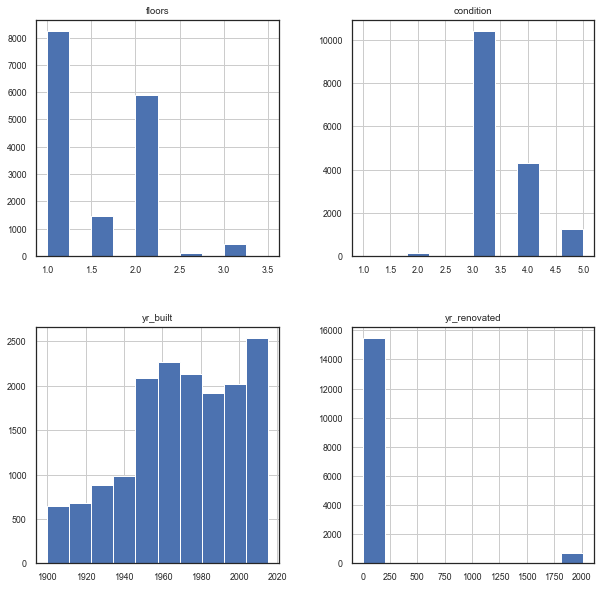

In [64]:
total_data[['floors','condition', 'yr_built', 'yr_renovated']].hist(figsize=(10, 10))

In [112]:
total_data['floors'].value_counts()

1.0    8240
2.0    5901
1.5    1458
2.5     546
Name: floors, dtype: int64

In [113]:
total_data['condition'].value_counts()

3    10416
4     4313
5     1264
2      152
Name: condition, dtype: int64

In [114]:
total_data['yr_built'].value_counts()

2014    389
2006    319
2005    317
1977    313
2004    301
       ... 
1933     25
1901     25
1902     23
1935     19
1934     17
Name: yr_built, Length: 116, dtype: int64

In [115]:
total_data['yr_renovated'].value_counts()

0    15461
1      684
Name: yr_renovated, dtype: int64

In [75]:
a = total_data[total_data['yr_renovated']!=0]

In [78]:
b = a['yr_renovated'] - a['yr_built']
b

3       62
12      89
26      86
33      54
49      23
        ..
4163    62
4170    26
4196    43
4258    66
4277    21
Length: 684, dtype: int64

In [79]:
b.describe()

count    684.000000
mean      56.711988
std       24.209501
min        6.000000
25%       37.750000
50%       54.000000
75%       75.000000
max      114.000000
dtype: float64

### feature engineering-log_target

In [27]:
tr_y['price'] = np.log1p(tr_y['price'])

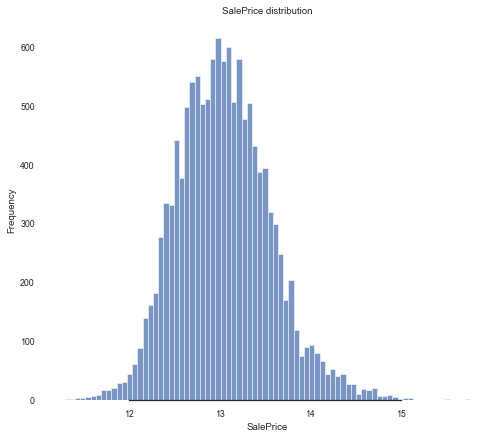

In [28]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.histplot(tr_y['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

## remove outliers